# 준비

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/3차 프로젝트_Early Bird팀/[참고자료] 문장 유형 분류 AI 경진대회/open/'

import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/content/drive/MyDrive/3차 프로젝트_5팀/[참고자료] 문장 유형 분류 AI 경진대회/open/train.csv')
test = pd.read_csv('/content/drive/MyDrive/3차 프로젝트_5팀/[참고자료] 문장 유형 분류 AI 경진대회/open/test.csv')

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
# LDA 시각화 하기
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=cb570247938c1c2d7d2d309625ca0779494ee42440c454b3c2d7e8a94ec17135
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=fb70779895867c029a494087f1a1fcec7835464d1159285ebd33977e12f7ff70
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
import pyLDAvis.gensim_models

print('문장 개수 :',len(data))

문장 개수 : 16541


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [138]:
# 한국 불용어 정의
file_path = '/content/drive/MyDrive/3차 프로젝트_5팀/[참고자료] 문장 유형 분류 AI 경진대회/open/korean_stopwords.txt'

with open(file_path) as f:
  lines = f.read().splitlines()

In [139]:
import re

ind = []
for i in range(0, len(lines)):
    a = re.compile(r'[가-힣]+')
    ind.append(a.findall(lines[i]))
    
reviews = [item for sublist in ind for item in sublist]

In [16]:
# 논문1
# 결과 미미
# reviews1 = ['가량', '가지', '각', '간', '갖은', '개', '개국', '개년', '개소', '개월', '걔', '거', '거기', '거리', '건', '것', '겨를',
#             '격', '겸', '고', '군', '군데', '권', '그', '그거', '그것', '그곳', '그까짓', '그네', '그녀', '그놈', '그대', '그래', '그래도', '그서',
#             '그러나', '그러니', '그러니까', '그러다가', '그러면', '그러면서', '그러므로', '그러자', '그런', '그런 데', '그럼', '그렇지만', '그루',
#             '그리고', '그리하여', '그분', '그이', '그쪽', '근', '근데', '글쎄', '글쎄요', '기', '김', '나', '나름', '나위', '남짓', '내', '냥', '너',
#             '너희', '네', '네놈', '녀석', '년', '년대', '년도', '놈', '누구', '니', '다른', '다만', '단', '달', '달러', '당신', '대', '대로', '더구나',
#             '더욱이', '데', '도', '동', '되', '두', '두세', '두어', '둥', '듯', '듯이', '등', '등등', '등지', '따라서', '따름', '따위', '딴', '때문',
#             '또', '또는', '또한', '리', '마당', '마련', '마리', '만', '만큼', '말', '매', '맨', '명', '몇', '몇몇', '모', '모금', '모든', '무렵', '무슨',
#             '무엇', '뭐', '뭣', '미터', '및', '바', '바람', '바퀴', '박', '발', '발짝', '번', '벌', '법', '별', '본', '부', '분', '뻔', '뿐', '살', '새',
#             '서너', '석', '설', '섬', '세', '세기', '셈', '쇤네', '수', '순', '스무', '승', '시', '시간', '식', '씨', '아', '아냐', '아니', '아니야', '아무',
#             '아무개', '아무런', '아아', '아이', '아이고', '아이구', '야', '약', '양', '얘', '어', '어느', '어디', '어머', '언제', '에이', '엔', '여기', '여느',
#             '여러', '여러분', '여보', '여보세요', '여지', '역시', '예', '옛', '오', '오랜', '오히려', '온', '온갖', '올', '왜냐하면', '왠', '외', '요', '우리',
#             '원', '월', '웬', '위', '음', '응', '이', '이거', '이것', '이곳', '이놈', '이래', '이런', '이런저런', '이른바', '이리하여', '이쪽', '일', '일대', 
#             '임마', '자', '자기', '자네', '장', '저', '저것', '저기', '저놈', '저런', '저쪽', '저편', '저희', '적', '전', '점', '제', '조', '주', '주년', '주일',
#             '줄', '중', '즈음', '즉', '지', '지경', '지난', '집', '짝', '쪽', '쯤', '차', '참', '채', '척', '첫', '체', '초', '총', '측', '치', '큰', '킬로미터',
#             '타', '터', '턱', '톤', '통', '투', '판', '퍼센트', '편', '평', '푼', '하기야', '하긴', '하물며', '하지만', '한', '한두', '한편', '허허', '헌', '현',
#             '호', '혹은', '회', '흥']

# 전체 윤곽

In [ ]:
text = data[['문장']]
text.head(5)

,문장
0,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.
1,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...
2,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...
3,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ..."
4,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# 텍스트 전처리
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
1  [이어, ＂앞으로, 전문가들과, 함께, 4주, 단위로, 상황을, 재평가할, 예정＂이...
2  [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
3  [서울시는, 올해, 3월, 즉시, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...


<ipython-input-17-c26f959d0e42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)


In [ ]:
# 한국 불용어 정의
file_path = '/content/drive/MyDrive/3차 프로젝트_Early Bird팀/최지원/한국어불용어(고빈도어).txt'

with open(file_path) as f:
  lines = f.read().splitlines()
  
print(lines)

['이\tVCP\t0.018279601', '있\tVA\t0.011699048', '하\tVV\t0.009773658', '것\tNNB\t0.00973315', '들\tXSN\t0.00689824', '그\tMM\t0.005327252', '되\tVV\t0.00361335', '수\tNNB\t0.003473622', '이\tNP\t0.003361203', '보\tVX\t0.003310379', '않\tVX\t0.0029757', '없\tVA\t0.002920476', '나\tNP\t0.002690479', '사람\tNNG\t0.002073917', '주\tVV\t0.001884579', '아니\tVCN\t0.001870774', '등\tNNB\t0.001822074', '같\tVA\t0.001724522', '우리\tNP\t0.001714509', '때\tNNG\t0.001685684', '년\tNNB\t0.001647755', '가\tVV\t0.001618626', '한\tMM\t0.001584036', '지\tVX\t0.001537763', '대하\tVV\t0.00150378', '오\tVV\t0.001490884', '말\tNNG\t0.001321876', '일\tNNG\t0.001239799', '그렇\tVA\t0.001232062', '위하\tVV\t0.001170618', '때문\tNNB\t0.001146647', '그것\tNP\t0.001099161', '두\tVV\t0.001063053', '말하\tVV\t0.001030587', '알\tVV\t0.000995693', '그러나\tMAJ\t0.000978246', '받\tVV\t0.000924084', '못하\tVX\t0.000904665', '일\tNNB\t0.000880239', '그런\tMM\t0.000879481', '또\tMAG\t0.000870985', '문제\tNNG\t0.000823954', '더\tMAG\t0.000801652', '사회\tNNG\t0.000793459', '많\t

In [ ]:
import re

ind = []
for i in range(0, len(lines)):
    a = re.compile(r'[가-힣]+')
    ind.append(a.findall(lines[i]))
    
reviews = [item for sublist in ind for item in sublist]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
1  [이어, ＂앞으로, 전문가들과, 함께, 4주, 단위로, 상황을, 재평가할, 예정＂이...
2  [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
3  [서울시는, 올해, 3월, 즉시, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...


<ipython-input-22-8308aac4e744>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
1  [이어, ＂앞으로, 전문가들과, 함께, 4주, 단위로, 상황을, 재평가할, 예정＂이...
2  [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
3  [서울시는, 올해, 3월, 즉시, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...


<ipython-input-25-31c0f8d9400f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


In [ ]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

0                                  [0.75, 1994년, 처음이다]
1    [＂앞으로, 전문가들과, 재평가할, 예정＂이라며, 이전이라도, 충족하면, 격리의무,...
2                                   [7월부터, 연말까지, 확대한다]
3    [서울시는, 유예시간, 60분을, 제공하겠다고, 밝혔지만, 자전거도로는, 하겠다고,...
4                                         [사다리에, 소금으로]
Name: 문장, dtype: object


In [ ]:
type(tokenized_doc)

pandas.core.series.Series

In [ ]:
# Reset the index
tokenized_doc = tokenized_doc.reset_index(drop=True)

In [ ]:
# LDA
tokenized_doc[:5]

0                                  [0.75, 1994년, 처음이다]
1    [＂앞으로, 전문가들과, 재평가할, 예정＂이라며, 이전이라도, 충족하면, 격리의무,...
2                                   [7월부터, 연말까지, 확대한다]
3    [서울시는, 유예시간, 60분을, 제공하겠다고, 밝혔지만, 자전거도로는, 하겠다고,...
4                                         [사다리에, 소금으로]
Name: 문장, dtype: object

In [ ]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [ ]:
print('정수로 인코딩 전 : ', dictionary[66])

정수로 인코딩 전 :  연금수령


In [ ]:
#  총 학습된 단어의 개수
len(dictionary)

53386

In [ ]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

(0, '0.005*"처음으로" + 0.005*"대통령이" + 0.003*"아이템을" + 0.003*"가능성도"')
(1, '0.009*"전망이다" + 0.007*"것이라고" + 0.006*"콘텐츠를" + 0.006*"제공하는"')
(2, '0.015*"코로나19" + 0.008*"것＂이라고" + 0.005*"한다＂고" + 0.005*"이어지고"')
(3, '0.007*"수준으로" + 0.006*"보유하고" + 0.006*"상황이다" + 0.005*"MMORPG"')
(4, '0.009*"가능하다" + 0.007*"제공한다" + 0.005*"기반으로" + 0.004*"있다＂며"')
(5, '0.010*"것이라는" + 0.006*"발생하는" + 0.005*"＇기생충＇이" + 0.005*"＇기생충＇"')
(6, '0.012*"2020년" + 0.008*"암호화폐" + 0.004*"증가했다" + 0.004*"상승세를"')
(7, '0.011*"가능성이" + 0.008*"2017년" + 0.007*"있습니다" + 0.006*"발표했다"')
(8, '0.016*"계획이다" + 0.005*"바탕으로" + 0.004*"부장판사" + 0.003*"대표하는"')
(9, '0.012*"블록체인" + 0.007*"이야기를" + 0.007*"우리나라" + 0.004*"코로나바이러스"')
(10, '0.023*"예정이다" + 0.009*"선보였다" + 0.008*"공개했다" + 0.004*"사람들은"')
(11, '0.005*"기준으로" + 0.004*"이더리움" + 0.004*"지원하는" + 0.004*"목소리가"')
(12, '0.016*"아카데미" + 0.009*"위해서는" + 0.006*"그러면서" + 0.005*"시상식에서"')
(13, '0.012*"강조했다" + 0.006*"필요하다" + 0.006*"것＂이라고" + 0.005*"대표적인"')
(14, '0.015*"2018년" + 0.009*"나타났다" + 0.007*"덧붙였다" + 0.007*"스타트업"')
(15, 

각 단어 앞에 붙은 수치는 단어의 해당 토픽에 대한 기여도를 보여줍니다. 또한 맨 앞에 있는 토픽 번호는 0부터 시작하므로 총 20개의 토픽은 0부터 19까지의 번호가 할당되어져 있습니다. passes는 알고리즘의 동작 횟수를 말하는데, 알고리즘이 결정하는 토픽의 값이 적절히 수렴할 수 있도록 충분히 적당한 횟수를 정해주면 됩니다. 여기서는 총 15회를 수행하였습니다. 여기서는 num_words=4로 총 4개의 단어만 출력하도록 하였습니다.

In [ ]:
# 만약 10개의 단어를 출력하고 싶다면?
print(ldamodel.print_topics())

[(0, '0.005*"처음으로" + 0.005*"대통령이" + 0.003*"아이템을" + 0.003*"가능성도" + 0.003*"설명하는" + 0.003*"판매한다" + 0.003*"중국에서" + 0.002*"올해부터" + 0.002*"솔루션을" + 0.002*"농협중앙회"'), (1, '0.009*"전망이다" + 0.007*"것이라고" + 0.006*"콘텐츠를" + 0.006*"제공하는" + 0.005*"가능성을" + 0.005*"바이러스" + 0.005*"시작했다" + 0.005*"운영하는" + 0.004*"고스란히" + 0.004*"비즈니스"'), (2, '0.015*"코로나19" + 0.008*"것＂이라고" + 0.005*"한다＂고" + 0.005*"이어지고" + 0.004*"가능성이" + 0.004*"드러냈다" + 0.003*"했다＂고" + 0.003*"바이러스를" + 0.003*"분석했다" + 0.003*"자신들의"'), (3, '0.007*"수준으로" + 0.006*"보유하고" + 0.006*"상황이다" + 0.005*"MMORPG" + 0.004*"인공지능" + 0.004*"프리미엄" + 0.003*"OLED" + 0.003*"이용자에게" + 0.003*"배틀로얄" + 0.003*"코로나19"'), (4, '0.009*"가능하다" + 0.007*"제공한다" + 0.005*"기반으로" + 0.004*"있다＂며" + 0.004*"안정적인" + 0.003*"방식이다" + 0.003*"예상된다" + 0.003*"캐릭터를" + 0.003*"전문가들은" + 0.002*"손흥민의"'), (5, '0.010*"것이라는" + 0.006*"발생하는" + 0.005*"＇기생충＇이" + 0.005*"＇기생충＇" + 0.004*"현지시간" + 0.004*"분야에서" + 0.004*"비판했다" + 0.003*"있었는데" + 0.003*"주장한다" + 0.003*"수준이다"'), (6, '0.012*"2020년" + 0.008*"암호화폐" + 0.004*"증가했다" + 

In [ ]:
# LDA 시각화 하기
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached funcy-1.18-py2.py3-none-any.whl (33 kB)
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=062e173a6f1f955cdaa7cdc7685c4b97148cb954bff4fe1bc1eb4756cd0508b1
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=b0f5e7aa0b919918c913b8ec1cee3cdf4b33d8d8ce2e0499f31b728b312f6e2f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Succ

In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


좌측의 원들은 각각의 20개의 토픽을 나타냅니다. 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다. 만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 위의 그림에서는 10번 토픽을 클릭하였고, 이에 따라 우측에는 10번 토픽에 대한 정보가 나타납니다. 한 가지 주의할 점은 LDA 모델의 출력 결과에서는 토픽 번호가 0부터 할당되어 

0 ~ 19의 숫자가 사용된 것과는 달리 위의 LDA 시각화에서는 토픽의 번호가 1부터 시작하므로 각 토픽 번호는 이제 +1이 된 값인 1~20까지의 값을 가집니다.

빨간색은 선택한 주제 내 예상 용어 빈도 뜻이다.

# 문장의 유형

## 사실형

In [140]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('유형').get_group('사실형')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실


In [141]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [142]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
1  [이어, ＂앞으로, 전문가들과, 4주, 단위로, 상황을, 재평가할, 예정＂이라며, ...
2  [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
3  [서울시는, 올해, 3월, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지만, ,...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...


In [143]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [144]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [145]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [146]:
#  총 학습된 단어의 개수
len(dictionary)

46643

In [147]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30 # N개의 토픽, k=N
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(14, '0.030*"예정이다" + 0.015*"2019년" + 0.005*"프리미엄" + 0.004*"OECD"')
(8, '0.006*"＇기생충＇의" + 0.005*"부장판사" + 0.005*"보여준다" + 0.005*"설명했다"')
(4, '0.015*"나타났다" + 0.009*"이야기를" + 0.008*"시장에서" + 0.004*"같다＂고"')
(21, '0.006*"아이템을" + 0.006*"우리나라는" + 0.005*"어려움을" + 0.004*"증가하고"')
(10, '0.027*"아카데미" + 0.010*"시스템을" + 0.009*"＇기생충＇은" + 0.008*"시상식에서"')
(3, '0.021*"블록체인" + 0.011*"시작했다" + 0.009*"시작으로" + 0.008*"가능성을"')
(13, '0.009*"암호화폐" + 0.007*"대표적인" + 0.006*"보유하고" + 0.006*"사람들은"')
(22, '0.006*"처음이다" + 0.004*"코로나19로" + 0.004*"떨어졌다" + 0.004*"이용자들의"')
(1, '0.017*"강조했다" + 0.011*"가능하다" + 0.008*"상황이다" + 0.006*"것＂이라고"')
(0, '0.008*"처음으로" + 0.006*"비판했다" + 0.006*"이벤트도" + 0.005*"이용자가"')
(7, '0.006*"LPGA" + 0.006*"됐다＂고" + 0.006*"보여주는" + 0.005*"차지했다"')
(29, '0.015*"기록했다" + 0.006*"＇기생충＇" + 0.005*"전문가들은" + 0.004*"만들었다"')
(28, '0.010*"콘텐츠를" + 0.009*"사람들이" + 0.006*"＇기생충＇이" + 0.006*"지적했다"')
(18, '0.026*"2018년" + 0.014*"것이라는" + 0.013*"제공한다" + 0.009*"때문이다"')
(26, '0.019*"알려졌다" + 0.014*"가능성이" + 0.008*"발표했다" + 0.008*"대통령이"')


### 결과

In [148]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

<LDAvis 사용 방법 및 해석>
 

LDAvis를 보면 크게 왼쪽(Intertopic Distance Map (via multidimensional scaling))과

오른쪽(Top-30 Most Relevant Terms for Topic) 두 부분이 있습니다.

 

<Intertopic Distance Map (via multidimensional scaling)>
- 토픽은 단어 개수의 차원을 가지고 있음->2차원으로 압축하기위해서는 차원 축소 방법 이용

- LDAvis는 Principal Component Analysis (PCA)를 이용하여 n_terms 차원의 벡터들을 2차원으로 압축

- 원의 크기 : 토픽의 단어들이 얼마나 속해 있고 어떻게 분포되어있는지

- 원의 거리 : 토픽 간의 유사성 (두 개의 원이 겹친다면 , 두 개의 토픽은 유사한 토픽이라는 의미)

- 버블 중 하나로 커서를 이동하면 오른쪽의 단어와 막대가 업데이트

 

 

 

<Top-30 Most Relevant Terms for Topic>
- 막대 : 토픽을 형성하는 주도적인 키워드 확인, 키워드에 커서를 올리면 해당 키워드와 관련된 토픽 확인 가능

    keyword extraction(키워드 추출) 기준 두 가지  

    1) salience 

          한 토픽의 키워드라면, 각 토픽에 속한 많은 문서들에서 등장해야 함

          P(w|t)가 커야 함 (단어 w를 갖고 있는 모든 문서들 중 토픽 t가 할당된 비율)

          문제점: P(w|t)가 가장높은 단어는 ‘a, the, -은, -는, -이, -가’ 와가’와 같은문법적인 단어일 것

          하지만 ‘a’라는 단어는 어떤 토픽을 명확히 지시해주지 않음

          차별성이 없는 단어는 키워드로 부적함

     2) discriminative power 

          salience의 문제점 -> LDAvis에서는 P(w|t)를 P(w)로 나눔

          한 토픽에서 자주 등장하는 단어라 하더라도 본래 자주 등장하는 단어라면 그 중요도를 낮추겠다는 의미

          문제점: 최고의 discriminative power를 지닌 단어는 infrequent terms(드문 단어) 일 가능성이 높음

          한 토픽에서만 등장한 단어는 전체에서도 몇 번 등장하지 않을 가능성이 높음

          즉, salience와와 discriminative power 사이에는 negative correlation 이 있음

          앙면을 모두 고려하여 키워드를 선택해야 함

 

이 문제점을 보완하기 위해서 LDAvis에서는 λ  값을 사용하여 두 관점의 중요도를 사람이 직접 정할 수 있습니다.

- λ  값 (Slide to adjust relevance metric)

    오른쪽 상단에  λ  값 [0, 1] 사이에서 조절 가능

    키워드 랭킹(막대그래프 순서)은 다음의 점수로 계산. 

    λ⋅P(w|t)+(1−λ)⋅P(w|t) P(w)λ⋅P(w|t)+(1−λ)⋅P(w|t) P(w)

    λ =1 일수록, 토픽 별로 가장 자주 등장하는 단어들을 우선적으로 키워드로 선택한다는 의미이고

    λ = 0 일수록, 토픽 간에 차이가 많이 나는 단어를 선택한다는 의미(해당 토픽에서 많이 등장한 단어)입니다.

## 추론형

In [149]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('유형').get_group('추론형')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
11,TRAIN_00011,취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.,추론형,부정,현재,확실,추론형-부정-현재-확실
17,TRAIN_00017,서울 아파트 매매가격이 여전히 상승세를 이어가고 있기 때문이다.,추론형,긍정,현재,확실,추론형-긍정-현재-확실
21,TRAIN_00021,1점 차로 초박빙 승부를 펼친 소리꾼 전영랑과 트로트 요정 강유진은 민요와 트로트의...,추론형,긍정,과거,확실,추론형-긍정-과거-확실


In [150]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [151]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                   문장
11      [취약점을, 보완하기, 위해, 무작정, 강력한, 보안장치를, 도입할, 수도, .]
17          [서울, 아파트, 매매가격이, 상승세를, 이어가고, 있기, 때문이다, .]
21  [1점, 차로, 초박빙, 승부를, 펼친, 소리꾼, 전영랑과, 트로트, 요정, 강유진...
32  [팔각정은, 관광도로로, 유명한, ＇북악, 스카이웨이＇로, 인근에, 있어, 이륜차,...
33  [상업영화, 데뷔작, ＇플란다스의, 개＇, (, 2000, ), 로는, 흥행하지, ...


In [152]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [153]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [154]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1)]


In [155]:
#  총 학습된 단어의 개수
len(dictionary)

7410

In [156]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(9, '0.018*"주의해야" + 0.017*"우리금융" + 0.017*"때문이었다" + 0.017*"자영업자의"')
(8, '0.021*"위해서는" + 0.016*"＇기생충＇이" + 0.015*"바탕으로" + 0.013*"때문이다"')
(17, '0.024*"카카오뱅크" + 0.016*"블록체인" + 0.013*"영의정에" + 0.013*"바이러스를"')
(23, '0.038*"풀이된다" + 0.032*"이들에게" + 0.016*"이어지며" + 0.016*"시작하면"')
(7, '0.019*"들어가는" + 0.017*"기대하는" + 0.017*"같이한다" + 0.016*"방향과도"')
(16, '0.029*"때문이다" + 0.021*"가능성이" + 0.020*"않았지만" + 0.018*"보여줘야"')
(29, '0.015*"때문이다" + 0.015*"비판했다" + 0.015*"디스플레이" + 0.015*"박문수는"')
(18, '0.040*"필요하다" + 0.017*"불확실성이" + 0.017*"세계적인" + 0.016*"가속화하고"')
(2, '0.014*"있다.＂" + 0.012*"그야말로" + 0.009*"간편해진" + 0.009*"책임감소는"')
(19, '0.022*"현금흐름이" + 0.022*"원리금을" + 0.022*"원활해야" + 0.005*"때문이다"')
(4, '0.029*"학생들이" + 0.015*"있겠지만" + 0.014*"해약하는" + 0.014*"말초신경이"')
(14, '0.020*"중산층이" + 0.018*"상황에서도" + 0.018*"판사들이" + 0.018*"상상력을"')
(6, '0.027*"강조했다" + 0.023*"보여준다" + 0.020*"푸드테크" + 0.019*"벗어나기"')
(10, '0.024*"과정에서" + 0.016*"대표적이다" + 0.016*"준비하는" + 0.016*"평가했다"')
(21, '0.018*"때문이다" + 0.018*"보여주는" + 0.016*"기대한다" + 0.016*"스타트업"')
(2

### 결과

In [157]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 대화형

In [158]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('유형').get_group('대화형')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
39,TRAIN_00039,사람 친구는 어느 한쪽에 애인이 생기면 끊어주는 게 쌈빡한 예의 아닐까.,대화형,긍정,미래,확실,대화형-긍정-미래-확실
63,TRAIN_00063,＂산소통도 셰르파도 포기한 채 나만의 힘으로 오른다는 뜻입니다.＂,대화형,긍정,현재,확실,대화형-긍정-현재-확실
72,TRAIN_00072,＂최민철 배우의 A형 독감 확진 판정으로 뮤지컬 레베카 1월 4일 잭 파벨 역 캐스...,대화형,긍정,과거,확실,대화형-긍정-과거-확실


In [159]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [160]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                    문장
39   [사람, 친구는, 한쪽에, 애인이, 생기면, 끊어주는, 게, 쌈빡한, 예의, 아닐까...
63       [＂산소통도, 셰르파도, 포기한, 채, 나만의, 힘으로, 오른다는, 뜻입니다.＂]
72   [＂최민철, 배우의, A형, 독감, 확진, 판정으로, 뮤지컬, 레베카, 1월, 4일...
134  [인공지능과, 기술들이, 이제는, 수도꼭지만, 틀면, 나오는, 수돗물처럼, 일상적으...
137               [제1야당인, 자유한국당이, 제도를, 반대하는, 무엇인가요, .]


In [161]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [162]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [163]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(1, 1), (2, 1), (3, 1), (4, 1)]


In [164]:
#  총 학습된 단어의 개수
len(dictionary)

1922

In [165]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(17, '0.017*"프로젝트" + 0.017*"바랍니다" + 0.009*"막으려고" + 0.009*"코로나19"')
(1, '0.010*"코로나가" + 0.010*"비례대표제가" + 0.010*"투자했다죠" + 0.010*"한국당은"')
(15, '0.017*"바이러스가" + 0.009*"프로젝트의" + 0.009*"해당합니다" + 0.009*"암호화폐에"')
(8, '0.009*"선거법에" + 0.009*"연동률을" + 0.009*"논리입니다" + 0.009*"25석을"')
(29, '0.021*"같습니다" + 0.014*"주식으로" + 0.007*"Diligence" + 0.007*"제공하는"')
(0, '0.014*"이번에는" + 0.014*"알트코인으로" + 0.014*"분석됩니다" + 0.009*"있습니다"')
(12, '0.015*"비례대표제가" + 0.008*"개인적으로" + 0.008*"한국당이" + 0.008*"2020은"')
(11, '0.017*"첫걸음을" + 0.008*"이소영은" + 0.008*"모습들도" + 0.008*"하더라.＂"')
(16, '0.007*"＂세상은" + 0.007*"중입니다" + 0.007*"있습니다" + 0.007*"나뉘지.＂"')
(3, '0.016*"프로젝트는" + 0.016*"있었습니다" + 0.008*"신속하게" + 0.008*"무엇인가요"')
(22, '0.019*"2020년" + 0.019*"시가총액" + 0.019*"디브리핑을" + 0.019*"이것으로"')
(13, '0.031*"있습니다" + 0.008*"되겠는가" + 0.008*"일찌감치" + 0.008*"다뤄져서야"')
(5, '0.013*"비례대표" + 0.013*"선출되는" + 0.007*"사립대에서" + 0.007*"확인해보세요"')
(19, '0.012*"셈입니다" + 0.006*"프라이빗한" + 0.006*"원한다면" + 0.006*"눈여겨볼"')
(4, '0.079*"있습니다" + 0.014*"비트코인이" + 0.014*"1,100

### 결과

In [166]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 예측형

In [167]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('유형').get_group('예측형')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
12,TRAIN_00012,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,예측형,긍정,미래,불확실,예측형-긍정-미래-불확실
47,TRAIN_00047,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...,예측형,부정,과거,확실,예측형-부정-과거-확실
147,TRAIN_00147,해상에서는 서해상을 중심으로 돌풍과 함께 천둥·번개가 치는 곳이 있겠다.,예측형,미정,미래,불확실,예측형-미정-미래-불확실


In [168]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [169]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                    문장
12   [비가, 내리는, 지역에서는, 돌풍과, 천둥·번개가, 치고, 일부, 지역에선, 우박...
47   [＂OTT, 사업을, 처음부터, 직접, 키우려, 했다면, 쿠팡플레이의, ＇타임, 투...
147   [해상에서는, 서해상을, 중심으로, 돌풍과, 천둥·번개가, 치는, 곳이, 있겠다, .]
207  [정부는, 단기, 유동성에, 기여하는, 무역금융을, 지원해, 금융권과, 기업의, 자...
356  [정부는, 화물차와, 택시, 경유, 차량으로, 생계를, 잇는, 사람들을, 대상으로,...


In [170]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [171]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [172]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [173]:
#  총 학습된 단어의 개수
len(dictionary)

1109

In [174]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(22, '0.062*"전망이다" + 0.016*"영혼까지" + 0.016*"이자부담이" + 0.016*"맑겠으나"')
(6, '0.039*"앞바다에서" + 0.026*"UNLOCK" + 0.013*"그레이존에" + 0.013*"＇부수자산＇이라는"')
(3, '0.026*"예상된다" + 0.026*"전망이다" + 0.013*"계획이다" + 0.013*"해안선에서"')
(17, '0.116*"전망이다" + 0.020*"예정이다" + 0.020*"것이라는" + 0.010*"야놀자와"')
(20, '0.028*"예상된다" + 0.028*"계획이다" + 0.010*"0.5∼2.0ｍ" + 0.010*"6000원으로"')
(1, '0.037*"전망이다" + 0.025*"참여하는" + 0.013*"스태그플레이션으로" + 0.013*"인플레이션"')
(28, '0.027*"계획이다" + 0.014*"＇클로젯＇은" + 0.014*"하나·우리은행" + 0.014*"후보＇와의"')
(4, '0.046*"예상된다" + 0.023*"탈중앙화" + 0.012*"알려졌지만" + 0.012*"본격적인"')
(25, '0.032*"서류전형" + 0.032*"전망된다" + 0.016*"나서겠다는" + 0.016*"여성인재"')
(23, '0.025*"예측했다" + 0.025*"전망이다" + 0.025*"예정이다" + 0.013*"게임개발"')
(9, '0.015*"예상된다" + 0.015*"영재교·과학고에" + 0.015*"영재들은" + 0.015*"이후로는"')
(12, '0.024*"예정이다" + 0.024*"전망이다" + 0.024*"산업혁명" + 0.012*"2020년"')
(13, '0.029*"전망이다" + 0.015*"전망했다" + 0.015*"디지털세" + 0.015*"삼성전자·현대자동차"')
(18, '0.033*"이스포츠에" + 0.017*"갈라게임즈를" + 0.017*"게임들이" + 0.017*"전반적인"')
(5, '0.041*"전망이다" + 0.008*"자연스러운" +

### 결과

In [175]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# 문장의 극성

## 긍정

In [176]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('극성').get_group('긍정')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실


In [177]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [178]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
1  [이어, ＂앞으로, 전문가들과, 4주, 단위로, 상황을, 재평가할, 예정＂이라며, ...
2  [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
3  [서울시는, 올해, 3월, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지만, ,...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...


In [179]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [180]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [181]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [182]:
#  총 학습된 단어의 개수
len(dictionary)

51823

In [183]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(27, '0.032*"코로나19" + 0.017*"것＂이라고" + 0.014*"나타났다" + 0.007*"코로나바이러스"')
(10, '0.009*"선보였다" + 0.009*"필요하다" + 0.007*"아카데미" + 0.006*"＇기생충＇"')
(2, '0.004*"어려움을" + 0.004*"추가했다" + 0.004*"나타난다" + 0.003*"적극적인"')
(16, '0.018*"아카데미" + 0.009*"＇기생충＇이" + 0.008*"시상식에서" + 0.007*"＇기생충＇은"')
(15, '0.010*"공개했다" + 0.008*"특징이다" + 0.007*"대통령이" + 0.006*"프리미엄"')
(19, '0.014*"가능하다" + 0.012*"우리나라" + 0.007*"수준으로" + 0.005*"시장에서"')
(0, '0.010*"암호화폐" + 0.006*"운영하는" + 0.006*"데이터를" + 0.003*"개발하는"')
(13, '0.009*"발생하는" + 0.007*"이벤트도" + 0.007*"대표적인" + 0.005*"사용하는"')
(18, '0.014*"알려졌다" + 0.007*"기반으로" + 0.004*"수준이다" + 0.004*"안전운임제"')
(6, '0.008*"미세먼지" + 0.005*"현지시간" + 0.005*"아이템을" + 0.004*"사이에서"')
(1, '0.035*"때문이다" + 0.014*"2019년" + 0.005*"본격적인" + 0.005*"감소했다"')
(21, '0.027*"설명했다" + 0.024*"2018년" + 0.021*"관계자는" + 0.019*"가능성이"')
(20, '0.032*"예정이다" + 0.016*"서비스를" + 0.015*"과정에서" + 0.010*"시스템을"')
(29, '0.008*"상황이다" + 0.005*"목소리가" + 0.005*"자연스럽게" + 0.004*"소개했다"')
(14, '0.011*"것이라고" + 0.005*"우리나라는" + 0.005*"이더리움" + 0.005*"드러냈다"'

### 결과

In [184]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 부정

In [185]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('극성').get_group('부정')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
11,TRAIN_00011,취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다.,추론형,부정,현재,확실,추론형-부정-현재-확실
46,TRAIN_00046,1일 시장조사 업체인 D램익스체인지에 따르면 지난해 12월 D램(DDR4 8Gb) ...,사실형,부정,과거,확실,사실형-부정-과거-확실
47,TRAIN_00047,＂OTT 사업을 처음부터 직접 키우려 했다면 쿠팡플레이의 ＇타임 투 마켓(Time ...,예측형,부정,과거,확실,예측형-부정-과거-확실


In [186]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [187]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                    문장
11       [취약점을, 보완하기, 위해, 무작정, 강력한, 보안장치를, 도입할, 수도, .]
46   [1일, 시장조사, 업체인, D램익스체인지에, 따르면, 지난해, 12월, D램, (...
47   [＂OTT, 사업을, 처음부터, 직접, 키우려, 했다면, 쿠팡플레이의, ＇타임, 투...
65   [회사가, 임금, 인상률이나, 퇴직률, ,, 운용, 수익률, 연금액, 산정의, 기초...
121                   [위성정당은, 중도층, 흡수를, 위해, 만든, 것이, .]


In [188]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [189]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [190]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [191]:
#  총 학습된 단어의 개수
len(dictionary)

1883

In [192]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(1, '0.008*"사라졌으며" + 0.008*"코로나19가" + 0.008*"묶어놓았던" + 0.008*"어디까지"')
(25, '0.024*"없다.＂" + 0.008*"쳐다보지" + 0.008*"장사에만" + 0.008*"금융사를"')
(16, '0.007*"어려웠다" + 0.007*"2019년" + 0.007*"생산되는" + 0.007*"편의점은"')
(4, '0.015*"어디에서도" + 0.007*"동서고금" + 0.007*"Skew" + 0.007*"이뤄지지"')
(15, '0.010*"더불어시민당에" + 0.010*"모바일페이" + 0.010*"어렵다면" + 0.010*"나타난다"')
(29, '0.009*"개정되지" + 0.009*"유류세를" + 0.009*"금융위에서" + 0.009*"선임되는"')
(0, '0.007*"탄탄대로인" + 0.007*"나왔지만" + 0.007*"아름답다는" + 0.007*"행정소송"')
(26, '0.008*"60년대" + 0.008*"받았으나" + 0.008*"25명이" + 0.008*"105명"')
(22, '0.017*"것이다.＂" + 0.008*"드러내는" + 0.008*"거처했는데" + 0.008*"한국인은"')
(10, '0.007*"육안으로" + 0.007*"확인하기" + 0.007*"실패했다" + 0.007*"위원회는"')
(6, '0.015*"벗어나지" + 0.008*"실험실이나" + 0.008*"발견되었다는" + 0.008*"연구만을"')
(12, '0.012*"지나다가" + 0.012*"보았는데" + 0.012*"땔나무처럼" + 0.012*"49건은"')
(7, '0.014*"불가능하다" + 0.007*"문구만을" + 0.007*"대행하니" + 0.007*"창업비용을"')
(24, '0.009*"사겠다고" + 0.009*"돌아오지" + 0.009*"수준으로" + 0.009*"실손보험금을"')
(14, '0.009*"궁금증을" + 0.009*"없다＂며" + 0.009*"＂청춘인데도" + 0.009

### 결과

In [193]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 미정

In [194]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('극성').get_group('미정')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
45,TRAIN_00045,"＇월드 오브 드래곤네스트＇는 오는 8일 말레이시아, 싱가포르, 인도네시아, 필리핀,...",사실형,미정,현재,확실,사실형-미정-현재-확실
147,TRAIN_00147,해상에서는 서해상을 중심으로 돌풍과 함께 천둥·번개가 치는 곳이 있겠다.,예측형,미정,미래,불확실,예측형-미정-미래-불확실
244,TRAIN_00244,LAH는 에어버스헬리콥터의 H155B1 플랫폼을 기반으로 최신 항전장비와 무장사격통...,사실형,미정,미래,확실,사실형-미정-미래-확실


In [195]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [196]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                    문장
45   [＇월드, 오브, 드래곤네스트＇는, 오는, 8일, 말레이시아, ,, 싱가포르, ,,...
147   [해상에서는, 서해상을, 중심으로, 돌풍과, 천둥·번개가, 치는, 곳이, 있겠다, .]
244  [LAH는, 에어버스헬리콥터의, H155B1, 플랫폼을, 기반으로, 최신, 항전장비...
431      [＂확진, 임신부가, 태아나, 신생아에게, 코로나를, 전염시킬, 있나, ?, ＂]
436  [최대, 8인의, 전투부대를, 구성해, 지옥성물함, 공격대, 우두머리에, 도전할, ...


In [197]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [198]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [199]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(6, 1), (7, 1), (8, 1), (9, 1)]


In [200]:
#  총 학습된 단어의 개수
len(dictionary)

708

In [201]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(6, '0.021*"펼쳐지는" + 0.021*"함선간의" + 0.021*"출시한다는" + 0.021*"계획이다"')
(27, '0.016*"콘텐츠인" + 0.016*"＇투쟁의" + 0.016*"즐길수도" + 0.016*"우두머리에"')
(19, '0.018*"공모전＇을" + 0.018*"KF-X의" + 0.018*"의미부여" + 0.018*"고려하여"')
(18, '0.019*"24일~27일" + 0.019*"위협하는" + 0.019*"두려워하는" + 0.019*"가까울까"')
(9, '0.019*"＂호남과" + 0.019*"추천·동의" + 0.019*"여기에다가" + 0.019*"신설하겠다는"')
(5, '0.025*"슬기롭게" + 0.025*"입장에서는" + 0.025*"영아에게" + 0.025*"스마트폰이"')
(22, '0.043*"아이템을" + 0.022*"가능성도" + 0.022*"서버에서만" + 0.022*"식수원에"')
(26, '0.035*"예정이다" + 0.035*"이스포츠에" + 0.018*"바이러스일" + 0.018*"촉발하는"')
(12, '0.039*"교섭에서" + 0.039*"요인이기도" + 0.039*"총파업과" + 0.001*"플랫폼인"')
(15, '0.030*"떠올린다면" + 0.030*"내다봤다" + 0.030*"가동되고" + 0.030*"제2벤처붐이"')
(21, '0.022*"뇌졸중에" + 0.022*"만성질환인" + 0.022*"높이겠다＂고" + 0.022*"만든다는"')
(28, '0.024*"전망이다" + 0.024*"Online" + 0.024*"작품으로" + 0.024*"세울지다"')
(3, '0.023*"추천하는" + 0.023*"승객에게" + 0.023*"주고받은" + 0.023*"축적되는"')
(10, '0.022*"관광산업이" + 0.022*"큐레이터는" + 0.022*"협력에서" + 0.022*"만들어진다"')
(2, '0.037*"예정이다" + 0.019*"차이점은" + 0.019*"필자만의" + 0

### 결과

In [202]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# 문장의 시제

## 과거

In [203]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('시제').get_group('과거')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
8,TRAIN_00008,이번 서비스에는 네이버가 자체 개발한 초대규모 AI 하이퍼클로바 기술이 적용됐다.,사실형,긍정,과거,확실,사실형-긍정-과거-확실


In [204]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [205]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                   문장
1   [이어, ＂앞으로, 전문가들과, 4주, 단위로, 상황을, 재평가할, 예정＂이라며, ...
3   [서울시는, 올해, 3월, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지만, ,...
8   [서비스에는, 네이버가, 자체, 개발한, 초대규모, AI, 하이퍼클로바, 기술이, ...
14  [이어, ＂개별, 상황에, 응대해야, 것인지도, 모호한, 상황＂이라며, ＂이, 부분...
15  [사우스포게임즈가, 개발한, ＇스컬＇의, 경우도, 지난해, 부산인디커넥트, 페스티벌...


In [206]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [207]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [208]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [209]:
#  총 학습된 단어의 개수
len(dictionary)

31041

In [210]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(13, '0.023*"메타버스" + 0.023*"보여주는" + 0.021*"스콜세지" + 0.021*"아파트가"')
(9, '0.041*"처음으로" + 0.036*"이용자가" + 0.034*"우리나라의" + 0.008*"대해서는"')
(5, '0.041*"구성됐다" + 0.006*"대한민국" + 0.004*"마련했다" + 0.004*"더불어민주당"')
(28, '0.026*"것＂이라고" + 0.007*"떨어졌다" + 0.006*"수준으로" + 0.003*"예고했다"')
(12, '0.033*"바이러스를" + 0.033*"재미있게" + 0.033*"연출하고" + 0.022*"아카데미"')
(3, '0.040*"앞으로도" + 0.020*"덧붙였다" + 0.016*"한다＂고" + 0.004*"것＂이라고"')
(2, '0.032*"발표했다" + 0.029*"한국시간" + 0.025*"네트워크의" + 0.025*"20.2"')
(27, '0.032*"순서대로" + 0.032*"이랜드파크" + 0.032*"수입보험료" + 0.032*"상무보로"')
(24, '0.049*"선보였다" + 0.008*"스타트업" + 0.006*"＇기생충＇이" + 0.005*"부장판사"')
(14, '0.054*"마법사들의" + 0.027*"비디오몬스터는" + 0.027*"지팡이를" + 0.027*"＇예언자맛"')
(8, '0.030*"암호화폐" + 0.026*"＂지난해" + 0.025*"이용자에게" + 0.025*"일으켰다"')
(19, '0.054*"캄보디아" + 0.027*"부탁드린다＂고" + 0.027*"국회의원" + 0.027*"협약식을"')
(17, '0.033*"증가했다" + 0.029*"노력하겠다＂고" + 0.027*"180가구" + 0.027*"업데이트도"')
(29, '0.033*"연기됐다" + 0.032*"한빛소프트" + 0.032*"잃어버린" + 0.032*"이미지와"')
(1, '0.034*"보건복지부는" + 0.034*"단속기준＇을" + 0.034*"마련했다고" + 

### 결과

In [211]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 현재

In [212]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('시제').get_group('현재')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
5,TRAIN_00005,이같은 변화를 포함해 올해 종부세 과세 대상은 당초 21만4000명에서 12만100...,사실형,긍정,현재,확실,사실형-긍정-현재-확실


In [213]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [214]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...
5  [이같은, 변화를, 포함해, 올해, 종부세, 과세, 대상은, 당초, 21만4000명...
6  [수수꽃다리과로, 북한에서, 주로, 많이, 서식한다는, 수수꽃다리, ,, 남한의, ...
7  [가장, 최근에, 있었던, ,, OTT, 예능, 프로그램, 출연으로, 일약, 스타덤...


In [215]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [216]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [217]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1)]


In [218]:
#  총 학습된 단어의 개수
len(dictionary)

22698

In [219]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(10, '0.011*"방침이다" + 0.010*"미세먼지" + 0.008*"나타난다" + 0.005*"확산되면서"')
(27, '0.014*"위해서는" + 0.005*"제기된다" + 0.005*"어렵다는" + 0.004*"기록이다"')
(3, '0.008*"모습이다" + 0.007*"전문가들은" + 0.005*"설명이다" + 0.005*"자동으로"')
(1, '0.009*"블록체인" + 0.007*"기대감이" + 0.007*"감안하면" + 0.005*"당사자가"')
(28, '0.021*"상황이다" + 0.008*"시스템을" + 0.006*"콘텐츠다" + 0.006*"스타트업"')
(6, '0.006*"방식으로" + 0.005*"차원에서" + 0.005*"현재까지" + 0.005*"＇기생충＇의"')
(18, '0.032*"코로나19" + 0.016*"서비스를" + 0.011*"과정에서" + 0.010*"암호화폐"')
(15, '0.007*"＇기생충＇은" + 0.006*"제품이다" + 0.004*"있으므로" + 0.003*"처음으로"')
(16, '0.012*"상황에서" + 0.008*"추진하고" + 0.007*"본격적인" + 0.007*"마스크를"')
(4, '0.008*"상승세를" + 0.008*"자연스럽게" + 0.008*"사람들의" + 0.006*"비례대표"')
(11, '0.018*"특징이다" + 0.009*"수준이다" + 0.008*"수준으로" + 0.007*"작품이다"')
(17, '0.022*"가능성이" + 0.014*"제공한다" + 0.012*"보유하고" + 0.008*"대상으로"')
(19, '0.022*"제공하는" + 0.009*"프리미엄" + 0.009*"이야기를" + 0.007*"코로나19"')
(9, '0.015*"있습니다" + 0.012*"발생하는" + 0.008*"주장한다" + 0.007*"지금까지"')
(12, '0.021*"것이라는" + 0.011*"시장에서" + 0.009*"이벤트도" + 0.006*"사용하는"')
(21, '

### 결과

In [220]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 미래

In [221]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('시제').get_group('미래')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
12,TRAIN_00012,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,예측형,긍정,미래,불확실,예측형-긍정-미래-불확실
39,TRAIN_00039,사람 친구는 어느 한쪽에 애인이 생기면 끊어주는 게 쌈빡한 예의 아닐까.,대화형,긍정,미래,확실,대화형-긍정-미래-확실


In [222]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [223]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                   문장
2   [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
12  [비가, 내리는, 지역에서는, 돌풍과, 천둥·번개가, 치고, 일부, 지역에선, 우박...
39  [사람, 친구는, 한쪽에, 애인이, 생기면, 끊어주는, 게, 쌈빡한, 예의, 아닐까...
48  [계약서, 작성이나, 분쟁, 해결, 과정에서, 원칙과, 기준을, 조금이라도, 알면,...
52          [한빛소프트는, 올해도, 리폼, 이벤트를, 계속, 진행할, 계획이다, .]


In [224]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [225]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [226]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [227]:
#  총 학습된 단어의 개수
len(dictionary)

6625

In [228]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(21, '0.009*"세계랭킹" + 0.005*"＇에피소드" + 0.005*"앞으로는" + 0.005*"자연공원법"')
(12, '0.008*"예정이다" + 0.008*"계획이다" + 0.008*"전망이다" + 0.004*"고용노동부"')
(18, '0.011*"계획이다" + 0.005*"무엇보다" + 0.005*"예정이다" + 0.005*"6일까지"')
(17, '0.013*"전망이다" + 0.010*"이벤트도" + 0.005*"아카데미" + 0.005*"실시한다"')
(6, '0.010*"계획이다" + 0.010*"가능성이" + 0.008*"예정이다" + 0.004*"도쿄올림픽"')
(20, '0.015*"예정이다" + 0.007*"전망이다" + 0.005*"있습니다" + 0.005*"제공한다"')
(13, '0.012*"예정이다" + 0.006*"전망이다" + 0.004*"2022년" + 0.004*"아이템을"')
(7, '0.021*"예정이다" + 0.005*"방침이다" + 0.004*"이벤트도" + 0.004*"＇서머너즈워"')
(8, '0.011*"전망이다" + 0.006*"계획이다" + 0.004*"대통령이" + 0.004*"전망된다"')
(23, '0.009*"축하해＇" + 0.008*"예정이다" + 0.004*"이자납입" + 0.004*"전망이다"')
(28, '0.009*"계획이다" + 0.007*"방침이다" + 0.005*"에어라인" + 0.005*"상황에서"')
(29, '0.008*"계획이다" + 0.004*"전망이다" + 0.004*"1000원당" + 0.004*"이용자는"')
(4, '0.038*"예정이다" + 0.006*"부정적인" + 0.004*"최적화된" + 0.004*"김신영은"')
(26, '0.010*"계획이다" + 0.006*"예정이다" + 0.006*"유급휴가를" + 0.004*"예정이며"')
(14, '0.009*"전망이다" + 0.005*"블록체인" + 0.005*"손흥민의" + 0.005*"소나기가"')
(3, 

### 결과

In [229]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# 문장의 확실성

## 확실

In [230]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('확실성').get_group('확실')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실


In [231]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [232]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                  문장
0  [0.75, %, 포인트, 금리, 인상은, 1994년, 이후, 28년, 만에, 처음...
1  [이어, ＂앞으로, 전문가들과, 4주, 단위로, 상황을, 재평가할, 예정＂이라며, ...
2  [정부가, 고유가, 대응을, 위해, 7월부터, 연말까지, 유류세, 인하, 폭을, 3...
3  [서울시는, 올해, 3월, 견인, 유예시간, 60분을, 제공하겠다고, 밝혔지만, ,...
4  [익사한, 자는, 사다리에, 태워, 거꾸로, 놓고, 소금으로, 코를, 막아, 가득,...


In [233]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [234]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [235]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [236]:
#  총 학습된 단어의 개수
len(dictionary)

50426

In [237]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(26, '0.037*"때문이다" + 0.006*"대해서도" + 0.005*"금융위기" + 0.004*"나타난다"')
(27, '0.014*"가능성이" + 0.010*"시스템을" + 0.009*"위해서는" + 0.008*"보여준다"')
(7, '0.010*"시작했다" + 0.008*"대통령이" + 0.008*"＇기생충＇" + 0.006*"처음이다"')
(8, '0.018*"2020년" + 0.014*"2019년" + 0.009*"스타트업" + 0.006*"운영하는"')
(22, '0.009*"것이라고" + 0.008*"MMORPG" + 0.007*"있습니다" + 0.004*"있었지만"')
(21, '0.010*"공개했다" + 0.005*"차원에서" + 0.005*"메타버스" + 0.005*"＇프라시아"')
(12, '0.007*"2012년" + 0.007*"방식으로" + 0.006*"없다＂고" + 0.005*"LPGA"')
(17, '0.009*"상황이다" + 0.008*"＇기생충＇이" + 0.006*"방침이다" + 0.006*"목소리가"')
(15, '0.015*"블록체인" + 0.009*"발생하는" + 0.008*"대한민국" + 0.005*"테스트를"')
(1, '0.009*"수준으로" + 0.008*"특징이다" + 0.006*"처음으로" + 0.006*"지속적으로"')
(14, '0.010*"선보였다" + 0.007*"이벤트도" + 0.007*"미세먼지" + 0.005*"발생했다"')
(24, '0.010*"것＂이라며" + 0.009*"필요하다" + 0.005*"않는다＂고" + 0.005*"적극적으로"')
(5, '0.027*"것＂이라고" + 0.013*"가능하다" + 0.012*"있다＂며" + 0.011*"우리나라"')
(10, '0.039*"코로나19" + 0.013*"알려졌다" + 0.009*"2016년" + 0.009*"상황에서"')
(3, '0.006*"발표했다" + 0.005*"배틀로얄" + 0.005*"이어지고" + 0.004*"본격적으로"'

### 결과

In [238]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## 불확실

In [239]:
# GroupBy 오브젝트 특성 - get_group() -> 그룹 안에 데이터를 확인하고 싶은 경우 사용한다.
data1 = data.groupby('확실성').get_group('불확실')
data1.head(3)

,ID,문장,유형,극성,시제,확실성,label
12,TRAIN_00012,비가 내리는 지역에서는 돌풍과 함께 천둥·번개가 치고 일부 지역에선 우박이 떨어지는...,예측형,긍정,미래,불확실,예측형-긍정-미래-불확실
32,TRAIN_00032,팔각정은 관광도로로 유명한 ＇북악 스카이웨이＇로 인근에 있어 이륜차 운전자들이 즐겨...,추론형,긍정,현재,불확실,추론형-긍정-현재-불확실
52,TRAIN_00052,한빛소프트는 올해도 리폼 이벤트를 계속 진행할 계획이다.,사실형,긍정,미래,불확실,사실형-긍정-미래-불확실


In [240]:
# 텍스트 전처리
text = data1[['문장']]
text['문장'] = text.apply(lambda row: nltk.word_tokenize(row['문장']), axis=1)

In [241]:
# 불용어 제거
stop_words = reviews
text['문장'] = text['문장'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head(5))

                                                   문장
12  [비가, 내리는, 지역에서는, 돌풍과, 천둥·번개가, 치고, 일부, 지역에선, 우박...
32  [팔각정은, 관광도로로, 유명한, ＇북악, 스카이웨이＇로, 인근에, 있어, 이륜차,...
52          [한빛소프트는, 올해도, 리폼, 이벤트를, 계속, 진행할, 계획이다, .]
62  [배우들은, 별도의, 관광, 없이, 한국으로, 10일, (, 현지시간, ), 출발할...
79  [언론, 홍보에, 취약한, 작은, 규모의, 공연에, 보도자료, 릴리즈, SNS채널을...


In [242]:
# 표제어 추출
## 3인칭 단수 표현 → 1인칭으로 바꿈
## 과거 현재형 동사 → 현채형으로 바꿈

text['문장'] = text['문장'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [243]:
# 길이가 3 이하인 단어에 대해서 제거
tokenized_doc = text['문장'].apply(lambda x: [word for word in x if len(word) > 3])

In [244]:
# 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록
# 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 뉴스를 출력해봅시다.

dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(5, 1), (6, 1), (7, 1), (8, 1)]


In [245]:
#  총 학습된 단어의 개수
len(dictionary)

4932

In [246]:
# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 30
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(18, '0.009*"알려졌다" + 0.009*"예상되는" + 0.009*"전망이다" + 0.006*"기준금리를"')
(3, '0.010*"예정이다" + 0.007*"기반으로" + 0.007*"실감나게" + 0.007*"때문이다"')
(22, '0.013*"예정이다" + 0.005*"항암치료" + 0.005*"주화＇를" + 0.003*"시장에서는"')
(0, '0.009*"전망이다" + 0.009*"예정이다" + 0.006*"상대생존율은" + 0.006*"첨단산업"')
(27, '0.009*"가능성이" + 0.006*"전망이다" + 0.006*"탈중앙화" + 0.006*"캐릭터의"')
(4, '0.011*"가능성이" + 0.008*"예정이다" + 0.008*"계획이다" + 0.006*"캐릭터를"')
(15, '0.009*"예상된다" + 0.009*"예정이다" + 0.006*"100명" + 0.005*"떨어진다는"')
(29, '0.009*"알려졌다" + 0.009*"슈퍼스타" + 0.006*"가입기간" + 0.006*"게이지가"')
(5, '0.006*"예정이다" + 0.006*"의약품이" + 0.006*"아니지만" + 0.003*"함유량을"')
(9, '0.010*"계획이다" + 0.007*"알려졌다" + 0.007*"예정이다" + 0.007*"전망이다"')
(14, '0.022*"계획이다" + 0.008*"예정이다" + 0.008*"2020년" + 0.006*"상태에서"')
(16, '0.019*"전망이다" + 0.008*"코로나19" + 0.006*"당사자가" + 0.006*"가능성도"')
(11, '0.007*"최고기온은" + 0.007*"중심으로" + 0.004*"전망이다" + 0.004*"엿보이는"')
(25, '0.011*"전망이다" + 0.011*"계획이다" + 0.006*"학생들은" + 0.006*"알려졌다"')
(24, '0.011*"서비스를" + 0.008*"계획이다" + 0.005*"예정이다" + 0.005*"자동으로"')
(26, '0

### 결과

In [247]:
# LDA 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# LDA 파라미터 튜닝
Coherence score 값이 가장 크고, Perplexity score 값이 가장 작은게 좋다.

In [248]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import re
import json
import warnings
import time


In [249]:

import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary


In [251]:
coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics, nwords = 30, 100
    if i==0:
        p=1
    else:
        p=i*5
    tic = time.time()
    lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1 0.7078115940093994
Cpherence -20.62808686367009
Perplexity:  -9.873959101176235 




epoch 5 2.028400182723999
Cpherence -19.287562417760217
Perplexity:  -9.828434122652007 


epoch 10 4.169580936431885
Cpherence -19.271537842627943
Perplexity:  -9.821370286119201 


epoch 15 6.928958892822266
Cpherence -18.784544229305443
Perplexity:  -9.82148391266042 


epoch 20 7.199607610702515
Cpherence -18.409699412000997
Perplexity:  -9.82650462660034 


epoch 25 9.674165487289429
Cpherence -18.86072594743974
Perplexity:  -9.827557782020126 


epoch 30 12.18257737159729
Cpherence -18.556880319489775
Perplexity:  -9.815951957722813 


epoch 35 14.32131814956665
Cpherence -18.898708902563587
Perplexity:  -9.82054177256975 


epoch 40 15.442312002182007
Cpherence -19.07939411891342
Perplexity:  -9.816220735802718 


epoch 45 20.334503889083862
Cpherence -19.0437456412351
Perplexity:  -9.825051831014571 




In [252]:
perplexities

[-9.874010098959737,
 -9.82837183261534,
 -9.821370288854407,
 -9.821483913392424,
 -9.826504625295083,
 -9.827534252370297,
 -9.81595195525876,
 -9.82054177464107,
 -9.816264033156795,
 -9.825094446711196]

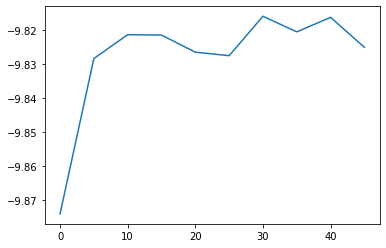

In [253]:
# 작은게 좋다.
import matplotlib.pyplot as plt

x = range(0, 46, 5)
plt.plot(x, perplexities) 

In [254]:
coherences

[-20.62808686367009,
 -19.287562417760217,
 -19.271537842627943,
 -18.784544229305443,
 -18.409699412000997,
 -18.86072594743974,
 -18.556880319489775,
 -18.898708902563587,
 -19.07939411891342,
 -19.0437456412351]

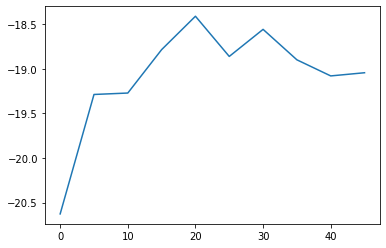

In [255]:
# 큰게 좋다.
x = range(0, 46, 5)
plt.plot(x, coherences)